In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets._samples_generator import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score


In [2]:
# 创建数据
x, y = make_blobs(n_samples=1000, n_features=2, centers=[[-1, -1], [0,0],[1,1],[2,2]], cluster_std=[0.4, 0.2, 0.3, 0.2], random_state=9)

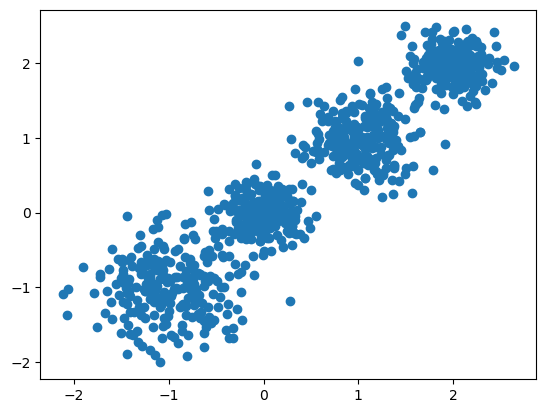

In [4]:
plt.scatter(x[:,0], x[:,1], marker='o')
plt.show()

D:\miniconda\envs\PythonProject\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\miniconda\envs\PythonProject\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


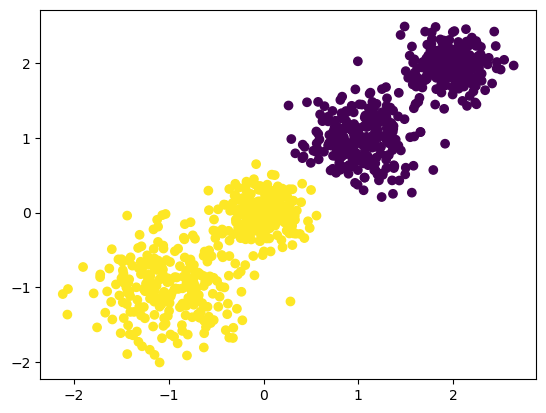

3011.315238742334


In [9]:
# k-means 训练
y_pre = KMeans(n_clusters=2, random_state=9).fit_predict(x)

# 可视化展示
plt.scatter(x[:,0], x[:,1], c=y_pre)
plt.show()

# 用ch_score查看最后结果
print(calinski_harabasz_score(x, y_pre))

 # 特征处理

In [10]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold

In [14]:
data = pd.read_csv('./data/factor_returns.csv')
    
# 实例化对象
transfer = VarianceThreshold(threshold=1)
    
transfer_data = transfer.fit_transform(data.iloc[:,1:10])
transfer_data

array([[ 5.95720000e+00,  1.18180000e+00,  8.52525509e+10, ...,
         1.21144486e+12,  2.07014010e+10,  1.08825400e+10],
       [ 7.02890000e+00,  1.58800000e+00,  8.41133582e+10, ...,
         3.00252062e+11,  2.93083692e+10,  2.37834769e+10],
       [-2.62746100e+02,  7.00030000e+00,  5.17045520e+08, ...,
         7.70517753e+08,  1.16798290e+07,  1.20300800e+07],
       ...,
       [ 3.95523000e+01,  4.00520000e+00,  1.70243430e+10, ...,
         2.42081699e+10,  1.78908166e+10,  1.74929478e+10],
       [ 5.25408000e+01,  2.46460000e+00,  3.28790988e+10, ...,
         3.88380258e+10,  6.46539204e+09,  6.00900728e+09],
       [ 1.42203000e+01,  1.41030000e+00,  5.91108572e+10, ...,
         2.02066110e+11,  4.50987171e+10,  4.13284212e+10]])

# 皮尔逊相关系数

In [18]:
from scipy.stats import pearsonr, spearmanr
x1 = [12.5, 15.3, 23.2, 26.4, 33.5, 34.4, 39.4, 45.2, 55.4, 60.9]
x2 = [21.2, 23.9, 32.9, 34.1, 42.5, 43.2, 49.0, 52.8, 59.4, 63.5]

# 判断
pearsonr(x1, x2)

PearsonRResult(statistic=0.9941983762371884, pvalue=4.922089955456965e-09)

# 斯皮尔曼系数

In [19]:
x1 = [12.5, 15.3, 23.2, 26.4, 33.5, 34.4, 39.4, 45.2, 55.4, 60.9]
x2 = [21.2, 23.9, 32.9, 34.1, 42.5, 43.2, 49.0, 52.8, 59.4, 63.5]

# 判断
spearmanr(x1, x2)

SignificanceResult(statistic=0.9999999999999999, pvalue=6.646897422032013e-64)

# 主成分分析

In [21]:
from sklearn.decomposition import PCA
data = [[2,8,4,5], [6,3,0,8], [5,4,9,1]]

# transfer = PCA(n_components=0.9)
transfer = PCA(n_components=3)

trans_data = transfer.fit_transform(data)
trans_data

array([[ 1.28620952e-15,  3.82970843e+00,  5.26052119e-16],
       [ 5.74456265e+00, -1.91485422e+00,  5.26052119e-16],
       [-5.74456265e+00, -1.91485422e+00,  5.26052119e-16]])

# 案例 

In [27]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [30]:
# 获取数据
order_product = pd.read_csv('./data/instacart/order_products__prior.csv')
products = pd.read_csv('./data/instacart/products.csv')
orders = pd.read_csv('./data/instacart/orders.csv')
aisles = pd.read_csv('./data/instacart/aisles.csv')

In [31]:
order_product.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [32]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [33]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [34]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [47]:
# 数据处理
# 合并数据
table1 = pd.merge(order_product, products, on=['product_id', 'product_id'])
table2 = pd.merge(table1, orders, on=['order_id', 'order_id'])
table = pd.merge(table2, aisles, on=['aisle_id', 'aisle_id'])

In [48]:
# 交叉表合并
table = pd.crosstab(table["user_id"], table["aisle"])

In [49]:
table.shape

(206209, 134)

In [60]:
new_data = data[:1000]
new_data.shape

(1000, 27)

In [63]:
# 特征降维
transfer = PCA(n_components=0.9)
data = transfer.fit_transform(new_data)
data.shape

(1000, 12)

In [64]:
# 机器学习
estimator = KMeans(n_clusters=5)
y_predict = estimator.fit_predict(data)
y_predict

D:\miniconda\envs\PythonProject\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\miniconda\envs\PythonProject\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


array([2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 3, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 0, 2, 2,
       2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 4, 0, 2,
       0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 4,
       2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 3, 2, 0, 0, 2, 2, 4, 2, 2, 0, 2, 0, 0, 4, 0,
       0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 4, 2,
       2, 0, 2, 0, 2, 4, 2, 0, 2, 2, 0, 1, 2, 2, 2, 4, 2, 0, 2, 2, 0, 0,
       0, 0, 3, 2, 2, 0, 4, 2, 0, 2, 2, 4, 0, 0, 0, 4, 2, 2, 2, 2, 2, 2,
       4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 3,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 3, 4, 2, 2, 0, 2, 2,
       2, 2, 1, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2,

In [65]:
# 模型评估
silhouette_score(new_data, y_predict)

0.44619428286542595